## Block 1: Import Libraries and Set Parameters
This block sets up the environment for the analysis.
It includes standard packages and baseline parameters for the consumer-side model.


In [12]:
# --- Block 1: Import Libraries and Set Parameters ---
import numpy as np
import matplotlib.pyplot as plt

# Parameters for consumer side
alpha = 0.3       # share of income spent on composite good
y = 100           # income
t = 1             # commuting cost per unit distance

# x-grid for distance from CBD
x_vals = np.linspace(0, y / t - 1e-3, 300)  # avoid division by zero near y/t

## Block 2: Define Consumer Bid-Rent Curve Function

This block defines a function that computes the **consumer bid-rent curve** \( p(x) \) for a given starting value \( p(0) \) at the CBD.

We assume Cobb-Douglas utility of the form:

\[
u(c, q) = c^\alpha q^{1 - \alpha}
\]

Consumers face the budget constraint:

\[
c + p(x) \cdot q = y - t x
\]

From Cobb-Douglas demand, optimal consumption is:

\[
c(x) = \alpha (y - t x), \quad q(x) = \frac{(1 - \alpha)(y - t x)}{p(x)}
\]

To ensure utility is constant across space (i.e., utility equalization), we fix \( p(0) \) and compute:

\[
\bar{U} = u(c(0), q(0)) = [\alpha y]^\alpha \left[ \frac{(1 - \alpha)y}{p(0)} \right]^{1 - \alpha}
\]

Then, for any distance \( x \), we invert the utility function to find the price per unit of housing that supports utility \( \bar{U} \):

\[
p(x) = \frac{(1 - \alpha)(y - t x)}{q(x)} \quad \text{where} \quad q(x) = \left( \frac{\bar{U}}{[\alpha(y - t x)]^\alpha} \right)^{\frac{1}{1 - \alpha}}
\]

This generates the **bid-rent curve** \( p(x) \) — the maximum price per unit of housing that consumers are willing to pay at each location \( x \), given a fixed utility level.


In [13]:
# --- Block 2: Define Consumer Bid-Rent Curve ---
def consumer_bid_rent(p0, alpha=alpha, y=y, t=t):
    """
    Compute the consumer bid-rent curve p(x) given a starting price p0 at x=0.
    Returns: p(x) array evaluated over x_vals.
    """
    # Utility level at x = 0
    c0 = alpha * y
    q0 = (1 - alpha) * y / p0
    U_bar = c0**alpha * q0**(1 - alpha)

    # Compute p(x) over space
    p_vals = []
    for x in x_vals:
        y_tx = y - t * x
        c = alpha * y_tx
        q = (U_bar / c**alpha)**(1 / (1 - alpha))
        p = (1 - alpha) * y_tx / q
        p_vals.append(p)

    return np.array(p_vals)


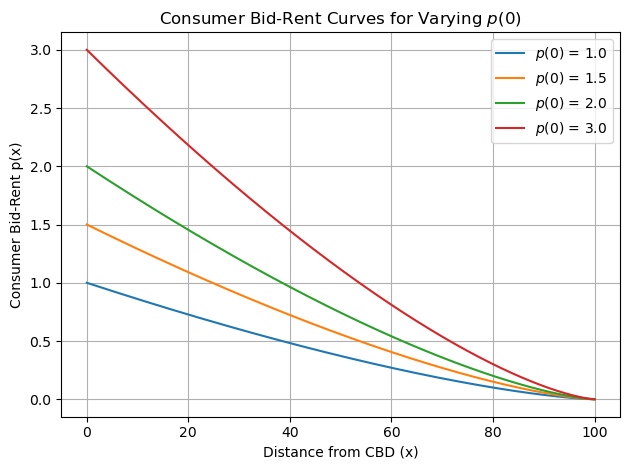

In [14]:
for p0 in [1.0, 1.5, 2.0, 3.0]:
    p_curve = consumer_bid_rent(p0)
    plt.plot(x_vals, p_curve, label=f"$p(0)$ = {p0}")

plt.xlabel("Distance from CBD (x)")
plt.ylabel("Consumer Bid-Rent p(x)")
plt.title("Consumer Bid-Rent Curves for Varying $p(0)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Block 4: Compute and Plot Density Profiles

This block computes and plots **population density** \( D(x) \) as implied by the bid-rent curve and Cobb-Douglas utility.

In equilibrium, each household chooses housing quantity \( q(x) \) according to:

\[
q(x) = \frac{(1 - \alpha)(y - t x)}{p(x)}
\]

Thus, population density (people per unit of land) is the reciprocal of housing demand:

\[
D(x) = \frac{1}{q(x)} = \frac{p(x)}{(1 - \alpha)(y - t x)}
\]

This expression shows that density is increasing in housing price and decreasing in distance-adjusted income. We compute \( D(x) \) by evaluating the bid-rent curve \( p(x) \) at each location, and then apply the formula above.

The resulting plot shows how equilibrium population density varies with distance from the CBD, for different values of \( p(0) \).


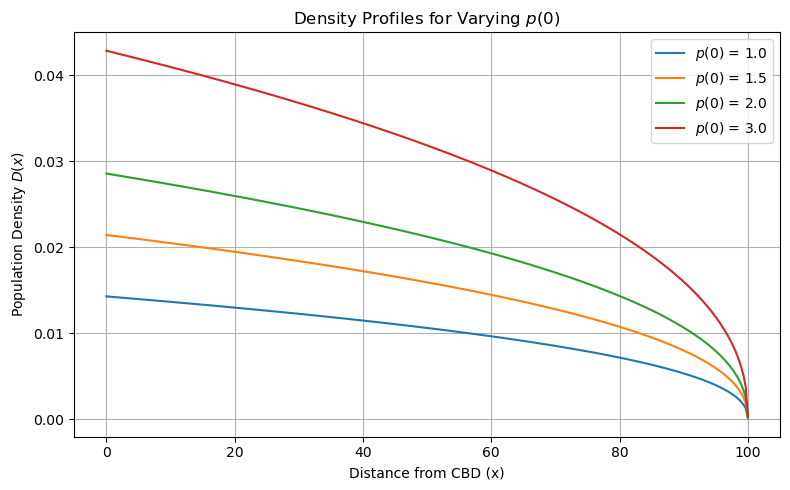

In [15]:
# --- Block 4: Compute and Plot Density Profiles ---
def consumer_density(p0, alpha=alpha, y=y, t=t):
    """
    Compute the population density D(x) = 1 / q(x) for given starting price p0.
    """
    p_vals = consumer_bid_rent(p0, alpha=alpha, y=y, t=t)
    y_tx = y - t * x_vals
    D_vals = p_vals / ((1 - alpha) * y_tx)
    return D_vals

plt.figure(figsize=(8, 5))

for p0 in [1.0, 1.5, 2.0, 3.0]:
    D_curve = consumer_density(p0)
    plt.plot(x_vals, D_curve, label=f"$p(0)$ = {p0}")

plt.xlabel("Distance from CBD (x)")
plt.ylabel("Population Density $D(x)$")
plt.title("Density Profiles for Varying $p(0)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
